### 類神經網路 ###

R square=0.9929
Root Mean square error is 0.0495
The Loss function is 0.0013
Number of iterations :2602


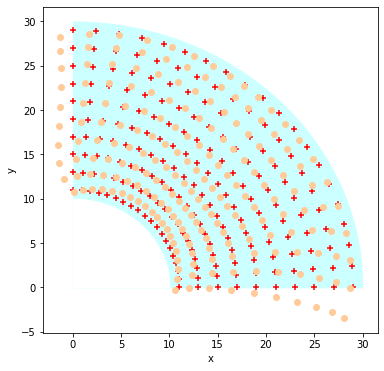

In [12]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Preaper training data (input)
l1, l2 = 20, 10
f1=lambda x:np.sqrt((l1+l2)**2-x**2)
f2=lambda x:np.sqrt(l2**2-x**2)

plt.figure(figsize=(6,6))
x=np.linspace(0,l1+l2,200)
plt.fill_between(x,f1(x),0,color="#CCFFFF")
x=np.linspace(0,l2,100)
plt.fill_between(x,f2(x),0,color="white")

t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1,1) @ np.cos(t.reshape(1,-1))
Y = l.reshape(-1,1) @ np.sin(t.reshape(1,-1))
plt.scatter(X.ravel(),Y.ravel(),marker='+',color='r')
# prepare training data (output)
theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 -\
        l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) - \
        np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))
# setup for ANN training
InputX = np.c_[X.ravel(), Y.ravel()] 
OutputY = np.c_[theta1, theta2] 
#-------------學習器的設定------------------------
hidden_layers = (10, )
solver = 'lbfgs' # the best for robot data 
# solver = ’sgd’
# solver = ’adam’
mlp_reg = MLPRegressor(max_iter = 80000, solver = solver, hidden_layer_sizes = hidden_layers, verbose = False, activation = 'logistic', # default activation = ’relu’ 
tol=1e-6, random_state = 0)#遞迴到80000次就停止,solver代表演算法,verbose代表是否要列印出演算法的過程
#-----------------------------------------------
mlp_reg.fit(InputX, OutputY) # Training ...
OutputY_hat = mlp_reg.predict(InputX) # Calculate fitted values 
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# convert to (x,y) positions
x_hat = l1 * np.cos(theta1_hat) + \
        l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + \
        l2 * np.sin(theta1_hat+theta2_hat)
#print(mlp_reg.get_params)
R_square=mlp_reg.score(InputX,OutputY)
print('R square={:.4f}'.format(R_square))
# mse=np.mean((OutputY-OutputY_hat)**2)
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print('Root Mean square error is {:.4f}'.format(rmse))  
LossFun=mlp_reg.loss_
print('The Loss function is {:.4f}'.format(LossFun))
print("Number of iterations :{}".format(mlp_reg.n_iter_))
#show the predicted data with the training data
plt.scatter(x_hat,y_hat,marker='o',color='#FFCC99')
plt.xlabel('x'),plt.ylabel('y')
plt.show()


在一圓形裡產生亂數

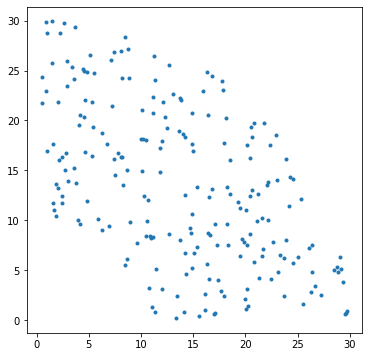

In [53]:
import numpy as np
from scipy.special import gammainc
import matplotlib.pyplot as plt
def randsphere(center, radius, n_per_sphere):
    '''
    generate random numbers in a n-dimensional sphere 
    i.e. in 2D, it is in a circle; in 3D, it is in a ball
    '''  
    r=radius
    ndim=center.size
    
    x=np.random.normal(size=(n_per_sphere,ndim))#標準常態分佈
    ssq=np.sum(x**2,axis=1)
    fr=r*gammainc(ndim/2,ssq/2)**(1/ndim)\
        /np.sqrt(ssq)
    frtiled=np.tile(fr.reshape(n_per_sphere,1),(1,ndim))
    p=center+np.multiply(x,frtiled)
    return p
radius_in=10
p=randsphere(np.array([0,0]),30,1000)
p=p[(p[:,0]>0)&(p[:,1]>0),:]#第一象限
d=np.sum(p**2,axis=1)
p=p[d>=radius_in**2,:]
plt.figure(figsize=(6,6))
plt.scatter(p[:,0],p[:,1],marker='.')
plt.show()



In [47]:
print(np.array([0,0]).size)

2


Trainer(TrainBFGS)
Epoch: 100; Error: 0.11884513829194533;
Epoch: 200; Error: 0.053091474775704854;
Epoch: 300; Error: 0.030854434014085677;
Epoch: 400; Error: 0.018866544019765896;
Epoch: 500; Error: 0.013271207023462758;
Epoch: 600; Error: 0.011296912828555501;
The goal of learning is reached
Mean Square Error in training:0.000067
Sum Square Error in training:0.009997
Sum Square Error in testing:0.020768


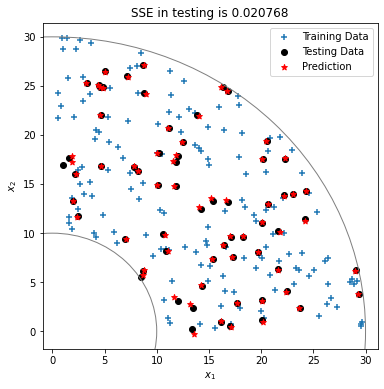

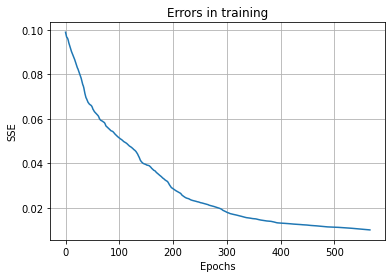

In [54]:
import neurolab as nl
l1,l2=20,10
n=1000
#data distributed randomly in circle
center=np.array([0,0])
radius_in,radius_out=10,30
x1, x2 = p[:,0], p[:,1]
x_train, x_test, y_train, y_test = \
    train_test_split(x1, x2, test_size = 0.3)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
# --------------------------------------------------
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax.scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax.add_artist(plt.Circle(center, radius_out,
        fill=False, color='0.5'))
ax.add_artist(plt.Circle(center, radius_in,
        fill=False, color='0.5'))        
# --------------------------------------------------
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]], 
    size = hidden_output_layers, transf = transf)
#change traning func, the default training function for rrgression is train_bfgs
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
# net.trainf = nl.train.train_cg # Newton-CG method Using scipy.optimize.fmin_ncg
# net.trainf = nl.train.train_gd
# net.trainf = nl.train.train_gdx
# net.errorf = nl.error.MSE() # default is SSE()
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, \
    goal = 0.01) # show := print period, the return is an error function 
# predicted output for training data
OutputY_hat = net.sim(InputX) 
# theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# predicted output for testing data
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax.scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')

mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
print("Mean Square Error in training:{:.6f}".format(mse(OutputY, OutputY_hat)))
print("Sum Square Error in training:{:.6f}".format(sse(OutputY, OutputY_hat)))
print("Sum Square Error in testing:{:.6f}".format(sse_test))
plt.title('SSE in testing is {:.6f}'.format(sse_test))
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
# img_dir = "C:/Users/CCWANG/OneDrive/FromDropBox/Public/book/PyImages/"
# plt.savefig(img_dir + "neurolab_20.eps", format='eps')
plt.show()
# plt.plot(err) # plot training error function: SSE
err = np.reshape(err, (-1, 1))
plt.plot(err[err < 0.1])
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.grid(True)
plt.title('Errors in training')
# plt.savefig(img_dir + "neurolab_20_err.eps", format='eps')
plt.show()

圖形辨識

montage網上下載方式

In [57]:
from sklearn.datasets import fetch_openml
from scipy.io import loadmat
import numpy as np
X,y=fetch_openml('mnist_784',return_X_y=True)#y:每張圖的數字總共有70000萬張
def montage(A,m,n):   
    sz=np.sqrt(X.shape[1]).astype('int')
    M=np.zeros((m*sz,n*sz))
    for i in range(m):
        for j in range(n):
            M[i*sz:(i+1)*sz,j*sz:(j+1)*sz]=\
                A[i*n+j,:].reshape(sz,sz)

    return M

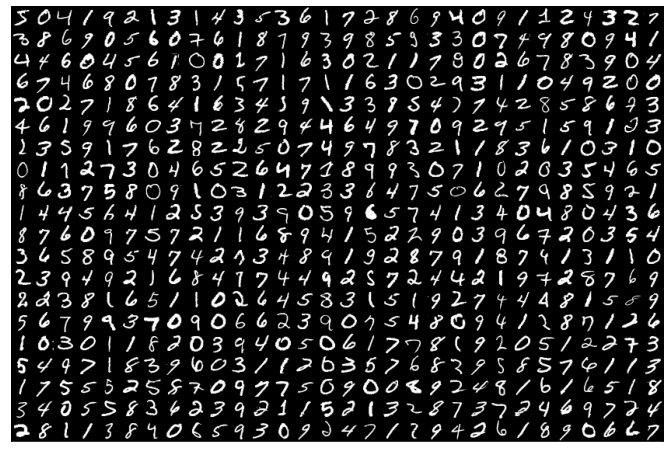

In [33]:
import matplotlib.pyplot as plt
import numpy as np
m,n=20,30
M=montage(np.array(X)[:m*n,:],m,n)#X有七萬列（七萬個數字），但是只想要取前20*30個數字來用
plt.figure(figsize=(12,8))
plt.imshow(M,cmap= 'gray')
# plt.imshow(M,cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay

#prepare data
N=2000 #sample size取兩千個樣本出來做分類
X_=np.array(X)[:N,:]#因為X是dataframe故要轉換成array
y_=np.array(y)[:N]
#setup and run ANN
hidden_layers=(30,)#one hidden layer
X_train, X_test, y_train, y_test = \
    train_test_split(X_/255, y_, test_size = 0.25)#除以255是為了讓數字標準化
# solver = ’sgd’ # not efficient, need more tuning # solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
#開始訓練資料
clf=MLPClassifier(max_iter=10000,solver=solver,
hidden_layer_sizes=hidden_layers,verbose=True,
activation='logistic',tol=1e-6,random_state=0)
clf.fit(X_train,y_train)
print("accuracy by score for tested data:{:.2f}%".format(100*clf.score(X_test,y_test)))


ValueError: Found input variables with inconsistent numbers of samples: [1000, 2000]

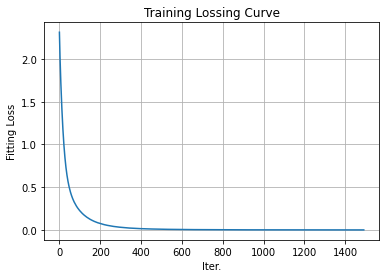

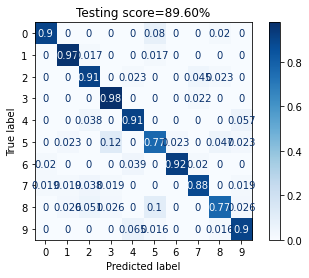

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.plot(clf.loss_curve_)
plt.grid(True)
plt.title('Training Lossing Curve')
plt.xlabel('Iter.')
plt.ylabel('Fitting Loss')
plt.show()
#測試資料結果
title='Testing score={:.2f}%'.format(100*clf.score(X_test,y_test))
disp=ConfusionMatrixDisplay.from_estimator(
clf,
X_test,
y_test,
cmap=plt.cm.Blues,
normalize='true',
)
disp.ax_.set_title(title)
plt.show()

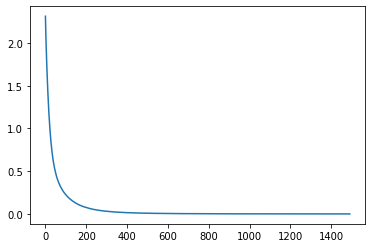

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.plot(clf.loss_curve_)


montage老師檔案下載方式

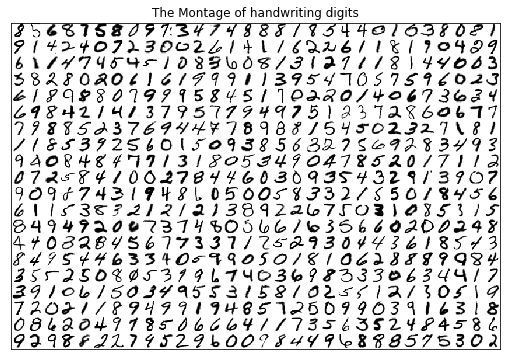

In [15]:
from scipy.io import loadmat
from sklearn.datasets import fetch_openml
# data_dir = '../Data/'
# X,y=fetch_openml('mnist_748,return_X_y')
D = loadmat('/Users/liang/Downloads/digits_train/Digits_train.mat') # D.keys()
X = D['X'] # images
y = D['y'] # labels: single output in 0~9
plt.figure(figsize = (9,6))
# prepare and diaplay a montage of digit images n,m=20,30 #Anxmmontage(totalmnimages)
n,m=20,30
sz = np.sqrt(X.shape[1]).astype('int') # image size sz x sz M = np.zeros((m*sz, n*sz)) # montage image
M=np.zeros((m*sz,n*sz))
A = np.array(X)[:m*n,:] # show the first nm images
# Arrange images to form a montage
for i in range(m) :
    for j in range(n) :
        M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
            A[i*n+j,:].reshape(sz, sz)

plt.imshow(M.T, cmap = plt.cm.gray_r, \
        interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting digits')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
# prepare data
X_train, X_test, y_train, y_test = \
    train_test_split(X/255, y.ravel(), test_size = 0.25)#除以255是為了讓數字標準化
# setup and run
hidden_layers = (30,) # one hidden layer
# solver = ’sgd’ # not efficient, need more tuning # solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
clf = MLPClassifier(max_iter = 10000, solver = solver,
hidden_layer_sizes = hidden_layers, verbose = True, activation = 'logistic', tol = 1e-6, random_state = 0) # default activation = ’relu’
clf.fit(X_train, y_train)#verbose=True是為了把過程可以呈現出來
y_test_hat = clf.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


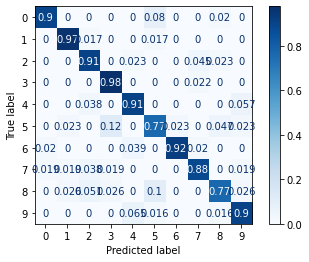

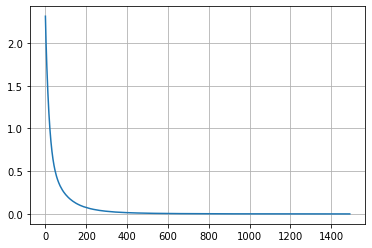

In [37]:
from sklearn.metrics import plot_confusion_matrix
score = clf.score(X_test, y_test)
# Confusion matrix
plot_confusion_matrix(clf, X_test, y_test,
    cmap = plt.cm.Blues, normalize = 'true')
plt.show()
plt.plot(clf.loss_curve_)
plt.grid(True)
plt.show()

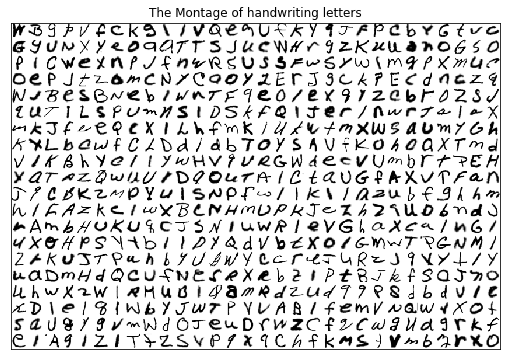

In [109]:
from scipy.io import loadmat
from sklearn.datasets import fetch_openml
# data_dir = '../Data/'
# X,y=fetch_openml('mnist_748,return_X_y')
D = loadmat('/Users/liang/Downloads/Letters_train.mat') 
# D.keys()
X = D['X'] # images
y = D['y'] # labels: single output in 0~9
plt.figure(figsize = (9,6))
# prepare and diaplay a montage of digit images n,m=20,30 #Anxmmontage(totalmnimages)
n,m=20,30
sz = np.sqrt(X.shape[1]).astype('int') # image size sz x sz M = np.zeros((m*sz, n*sz)) # montage image
M=np.zeros((m*sz,n*sz))
A = np.array(X)[:m*n,:] # show the first nm images
# Arrange images to form a montage
for i in range(m) :
    for j in range(n) :
        M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
            A[i*n+j,:].reshape(sz, sz)

plt.imshow(M.T, cmap = plt.cm.gray_r, \
        interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting letters')
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
# prepare data
X_train, X_test, y_train, y_test = \
    train_test_split(X, y.ravel(), test_size = 0.25)#除以255是為了讓數字標準化
# setup and run
hidden_layers = (30,) # one hidden layer
# solver = ’sgd’ # not efficient, need more tuning # solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
clf = MLPClassifier(max_iter = 10000, solver = solver,
hidden_layer_sizes = hidden_layers, verbose = False, activation = 'logistic', tol = 1e-6, random_state = 0) # default activation = ’relu’
clf.fit(X_train, y_train)#verbose=True是為了把過程可以呈現出來
y_test_hat = clf.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


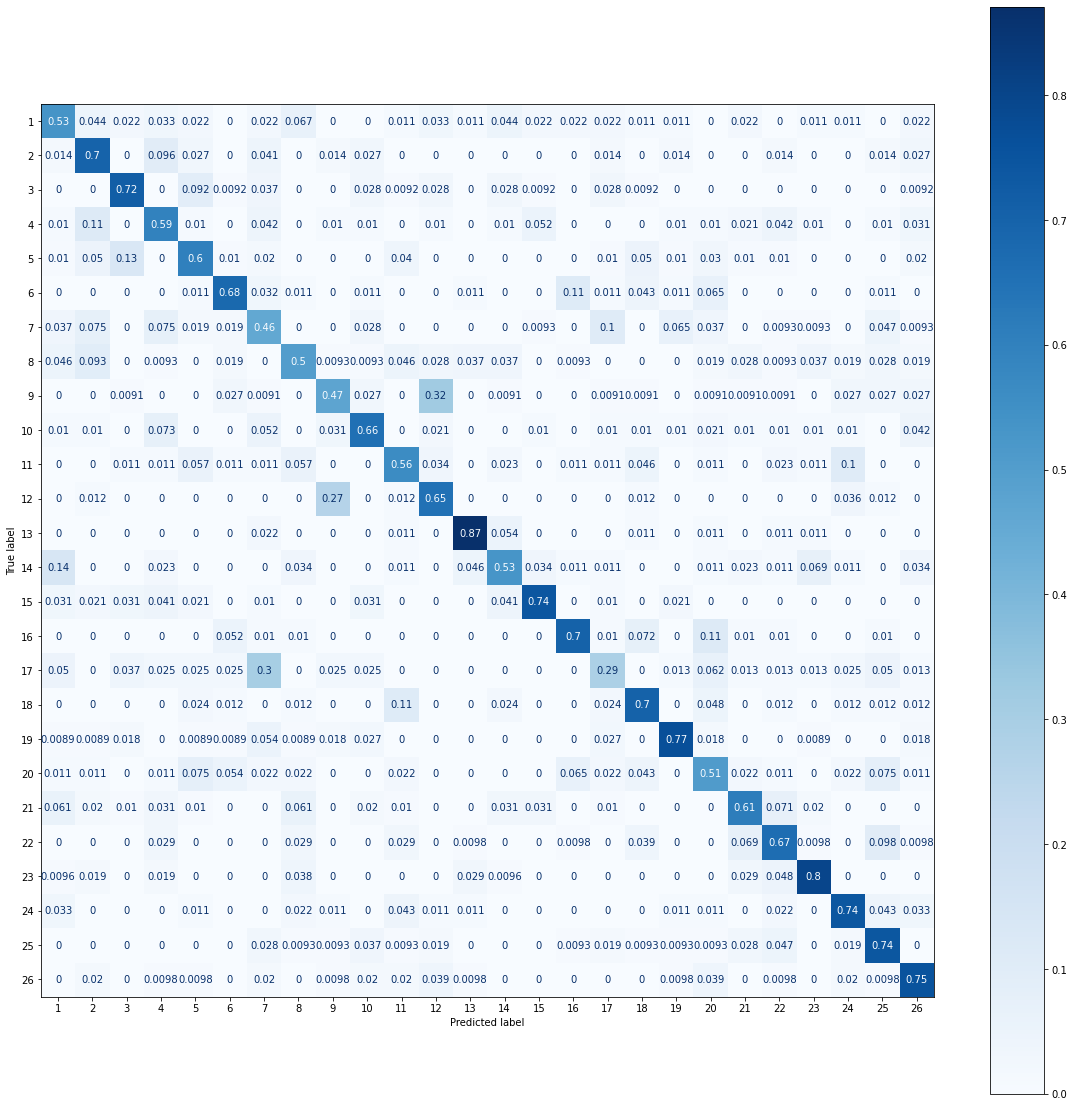

In [64]:
from sklearn.metrics import plot_confusion_matrix
score = clf.score(X_test, y_test)
fig, ax = plt.subplots(figsize=(20, 20))
# Confusion matrix
plot_confusion_matrix(clf, X_test, y_test,
    cmap = plt.cm.Blues, normalize = 'true',ax=ax)
plt.show()

In [95]:
import os 
DIR = '/Users/liang/Downloads/Raw Handwritten Roman Numerals Dataset/train/vi' #要統計的資料夾
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

232


In [105]:
df=imageio.imread("/Users/liang/Downloads/Raw Handwritten Roman Numerals Dataset/train/i/i_001.png")

/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_1467/690016256.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  df=imageio.imread("/Users/liang/Downloads/Raw Handwritten Roman Numerals Dataset/train/i/i_001.png")


In [108]:
from scipy.io import loadmat
from sklearn.datasets import fetch_openml
from scipy import misc
import imageio
import os
import pandas as pd
# df=pd.read_csv("/Users/liang/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")
files=[file for file in os.listdir("/Users/liang/Downloads/Raw Handwritten Roman Numerals Dataset/train")] ###os.listdir:返回當前目錄下所有檔案和資料夾，注意 path 是目錄路徑
files.remove('.DS_Store')

all_months_data=pd.DataFrame()    ##先建一個空的DataFrame來儲存所有資料
number_data=pd.DataFrame()
DIR = '/Users/liang/Downloads/Raw Handwritten Roman Numerals Dataset/train/vi' #要統計的資料夾

for j in np.arange(1,len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])+1):
    df=imageio.imread("/Users/liang/Downloads/Raw Handwritten Roman Numerals Dataset/train/i/i_00"+j+".png")

    # for j in np.size(files[i]):
    #     dg=misc.imread("/Users/liang/Downloads/Raw Handwritten Roman Numerals Dataset/train/"+file/j)
    #     numberdata=np.append([number_data,dg])
    # all_months_data=pd.append([all_months_data,df])    

# all_months_data.to_csv('all_data.csv',index=False)  ##index=False表示不想儲存前第一行的0,1,2,,,,,

TypeError: can only concatenate str (not "numpy.int64") to str

In [67]:



# data_dir = '../Data/'
# X,y=fetch_openml('mnist_748,return_X_y')
D = loadmat('/Users/liang/Downloads/Raw Handwritten Roman Numerals Dataset/train') 
# D.keys()
X = D['X'] # images
# y = [0,1,2,3,4,5,6,7,8,9] # labels: single output in 0~9
plt.figure(figsize = (9,6))
# prepare and diaplay a montage of digit images n,m=20,30 #Anxmmontage(totalmnimages)
n,m=20,30
sz = np.sqrt(X.shape[1]).astype('int') # image size sz x sz M = np.zeros((m*sz, n*sz)) # montage image
M=np.zeros((m*sz,n*sz))
A = np.array(X)[:m*n,:] # show the first nm images
# Arrange images to form a montage
for i in range(m) :
    for j in range(n) :
        M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
            A[i*n+j,:].reshape(sz, sz)

plt.imshow(M.T, cmap = plt.cm.gray_r, \
        interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting digits')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/liang/Downloads/Raw Handwritten Roman Numerals Dataset/train.mat'

In [1]:
air = '/Users/liang/Documents/統計數學與運算/images'
dataset= '/Users/liang/Documents/統計數學與運算/生成資料集'
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as LA 
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm
D = np.loadtxt( dataset+'/hw7_data7.txt')
X = D[:, 0:2]
y = D[:,2]

K=100 #bootstrapping K times
LOGISTIC_trainingErr,LOGISTIC_testingErr=np.zeros(K),np.zeros(K)
LDA_trainingErr,LDA_testingErr=np.zeros(K),np.zeros(K)
QDA_trainingErr,QDA_testingErr=np.zeros(K),np.zeros(K)
KNN5_trainingErr,KNN5_testingErr=np.zeros(K),np.zeros(K)
KNN15_trainingErr,KNN15_testingErr=np.zeros(K),np.zeros(K)
ANN10_trainingErr,ANN10_testingErr=np.zeros(K),np.zeros(K)
ANN20_trainingErr,ANN20_testingErr=np.zeros(K),np.zeros(K)
LOGISTIC_trainingErr,LOGISTIC_testingErr=np.zeros(K),np.zeros(K)

#學習器設定
Lda=LinearDiscriminantAnalysis(tol=1e-6)
Qda=QuadraticDiscriminantAnalysis(tol=1e-6,store_covariance=True)
Knn5=neighbors.KNeighborsClassifier(5,weights='uniform')
Knn15=neighbors.KNeighborsClassifier(15,weights='uniform')
Logistic=LogisticRegression()

opts=dict(max_iter=10000,solver='adam',verbose=False,activation='logistic',tol=1e-6)
Ann10=MLPClassifier(hidden_layer_sizes=(10,),**opts)
Ann20=MLPClassifier(hidden_layer_sizes=(20,),**opts)

for i in tqdm(range(K)):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(x_train,y_train)
        Qda.fit(x_train,y_train)
        Knn5.fit(x_train,y_train)
        Knn15.fit(x_train,y_train)
        Ann10.fit(x_train,y_train)
        Ann20.fit(x_train,y_train)
        Logistic.fit(x_train,y_train)

        LDA_trainingErr[i]=1-Lda.score(x_train,y_train)
        LDA_testingErr[i]=1-Lda.score(x_test,y_test)
        QDA_trainingErr[i]=1-Qda.score(x_train,y_train)
        QDA_testingErr[i]=1-Qda.score(x_test,y_test)
        KNN5_trainingErr[i]=1-Knn5.score(x_train,y_train)
        KNN5_testingErr[i]=1-Knn5.score(x_test,y_test)
        KNN15_trainingErr[i]=1-Knn15.score(x_train,y_train)
        KNN15_testingErr[i]=1-Knn15.score(x_test,y_test)
        ANN10_trainingErr[i]=1-Ann10.score(x_train,y_train)
        ANN10_testingErr[i]=1-Ann10.score(x_test,y_test)
        ANN20_trainingErr[i]=1-Ann20.score(x_train,y_train)
        ANN20_testingErr[i]=1-Ann20.score(x_test,y_test)
        LOGISTIC_trainingErr[i]=1-Logistic.score(x_train,y_train)
        LOGISTIC_testingErr[i]=1-Logistic.score(x_test,y_test)

print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))
print('QDA training Error:{:.4f}'.format(QDA_trainingErr.mean()))
print('QDA testing Error:{:.4f}'.format(QDA_testingErr.mean()))
print('KNN5 training Error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('KNN5 testing Error:{:.4f}'.format(KNN5_testingErr.mean()))
print('KNN15 training Error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('KNN15 testing Error:{:.4f}'.format(KNN15_testingErr.mean()))
print('ANN10 training Error:{:.4f}'.format(ANN10_trainingErr.mean()))
print('ANN10 testing Error:{:.4f}'.format(ANN10_testingErr.mean()))
print('ANN20 training Error:{:.4f}'.format(ANN20_trainingErr.mean()))
print('ANN20 testing Error:{:.4f}'.format(ANN20_testingErr.mean()))
print('LOGISTIC training Error:{:.4f}'.format(LOGISTIC_trainingErr.mean()))
print('LOGISTIC testing Error:{:.4f}'.format(LOGISTIC_testingErr.mean()))



100%|██████████| 100/100 [02:57<00:00,  1.77s/it]

LDA training Error:0.2907
LDA testing Error:0.2902
QDA training Error:0.2214
QDA testing Error:0.2245
KNN5 training Error:0.1872
KNN5 testing Error:0.2784
KNN15 training Error:0.2220
KNN15 testing Error:0.2447
ANN10 training Error:0.2237
ANN10 testing Error:0.2344
ANN20 training Error:0.2218
ANN20 testing Error:0.2314
LOGISTIC training Error:0.2940
LOGISTIC testing Error:0.2948
